In [4]:
import numpy as np
import pandas as pd

Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [5]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [3]:
# The problem? --> We can't retrieve the data of CSE because they are attached to each other
a['cse']

KeyError: 'cse'

The solution -> multiindex series(also known as Hierarchical Indexing)

 multiple index levels within a single index

In [6]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex.levels[1]
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [7]:
# creating a series with multiindex object
s = pd.Series([1,2,3,4,5,6,7,8],index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [8]:
# how to fetch items from such a series
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [9]:
s[('cse',2019)]

1

 A logical question to ask--> Is multindex series is 1-d or 2-d object 
 
 Ans --> 2-D since during data retrival we have to provide 2 value thus it is 2-d

In [10]:
#unstack --> By using unstack we can convert multiindex series in dataframe
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [11]:
#stack --> by using stack we can convert the dataframe into multiindex series
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

Why should we use multiindex series ? higher dimensions ke data ko series aur dataframe me represent kra skte hai eg. 3-d,4-d,5-d etc..

In [12]:
#multi index dataframe
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [13]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [14]:
branch_df1.loc['ece']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [15]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

Dataframe me agr transpose lga de to row column me badal jayega aur column row me iska mtlb multi-index dataframe kewal index means rows pr hi ni columns se pr bhi lgaya ja skta hai means columns hierarchy bhi bnta hai.(pandas rows aur columns ko same hi smjhta hai)

In [16]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [17]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [18]:
branch_df2['mumbai']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0
2022,0,0


In [19]:
branch_df2['delhi']['students']

2019    2
2020    4
2021    6
2022    8
Name: students, dtype: int64

In [20]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [21]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and unstacking

In [22]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [23]:
branch_df1.unstack()# andar wala index column me chala jayega aur column based multi index dataframe bn jayega

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [24]:
branch_df1.unstack().unstack() # 3-level of indexing in columns and it will convert in series

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [25]:
branch_df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [26]:
branch_df1.unstack().stack().stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [27]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [28]:
branch_df2.unstack()

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

In [29]:
branch_df2.stack()#stack columns ko row bnata hai aur unstack row ko column isme indexing level wise hoti hai andar wala uth
#ke level 1 indexing me chala jata hai same follows the unstack

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [30]:
branch_df2.stack().stack()

2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [31]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [32]:
branch_df3.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [33]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

### Working with multiindex dataframes

In [34]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [35]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [36]:
# multiple--> slicing done 
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [37]:
# using iloc --> slicing done by using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [38]:
#Extracting columns
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [39]:
# Extracting cols
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [40]:
branch_df3['delhi']['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [41]:
#Extracting multiple columns -->  
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [42]:
#delhi ka studenst aur mumbai ka avg_package nikalna hai
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [43]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [44]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [45]:
branch_df3.sort_index(ascending=[False,True])


delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [46]:
branch_df3.sort_index(level=0,ascending=[False])# level specify krne se sorting bs usi me hoti hai level 0 means yr wala 

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [47]:
# multiindex dataframe(col) -> transpose
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [48]:
# swaplevel --> index ko swap kr dega yr wala aur branch wale me
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [49]:
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long vs Wide data

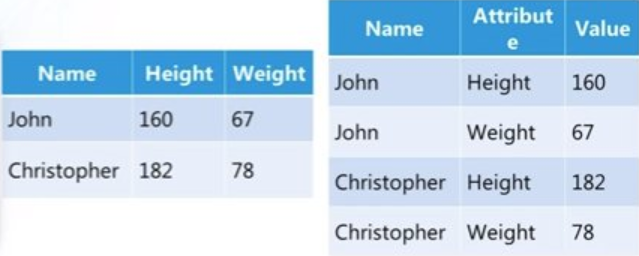
<h4>Wide format :</h4> is where we have a single row for every data point with multiple columns to hold the values of various attributes.

<h4>Long format:</h4> is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

- melt --> Wide data formate ko long data format me convert krta hai
- pivot --> long data format ko wide me convert krta hai

In [50]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]})

,cse
0,120


In [51]:
pd.DataFrame({'cse':[120]}).melt()

,variable,value
0,cse,120


In [52]:
# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]})

,cse,ece,mech
0,120,100,50


In [53]:
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [54]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [55]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')#id me jo column dalenge wo row me convert ni hoga

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [56]:
death=pd.read_csv('death.csv')
confirm=pd.read_csv('confirm.csv')

In [57]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [58]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [59]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [60]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [61]:
confirm.head()

,Province/State,Country/Region,Lat,Long,date,num_cases
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [62]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])

,Province/State,Country/Region,Lat,Long,date,num_cases,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [63]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot table 

In [64]:
import seaborn as sns

In [65]:
df=sns.load_dataset('tips')

In [66]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
#gender k basis pr avg total bill nikalna hai
df.groupby(['sex'])[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [68]:
df.groupby(['sex','smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [69]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

pivot table me parameter me pass krna hota hai index me kon sa column index bnega next kon sa columns column bnega aur fir values me jis column ke liye summary nikalna hai wo dalte hai

In [70]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [71]:
#aggfunc --> aggregate function we can provide but by default it is mean
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [72]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [73]:
# all cols together -> when we don't provide value then it gives summary of all the numerical columns
df.pivot_table(index='sex',columns='smoker')

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [74]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [75]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill',aggfunc='count')

day            Thur          Fri          Sat          Sun       
time          Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner
sex    smoker                                                    
Male   Yes       10      0     3      5     0     27     0     15
       No        20      0     0      2     0     32     0     43
Female Yes        7      0     3      4     0     15     0      4
       No        24      1     1      1     0     13     0     14

In [76]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'sum','total_bill':'sum'})

size                                                tip  \
day                Thur              Fri              Sat       Sun   Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner  Lunch   
sex    smoker                                                                
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  30.58   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  58.83   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  20.93   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  58.49   

                                   ...               total_bill                \
day                    Fri         ...   Sun               Thur           Fri   
time          Dinner Lunch Dinner  ... Lunch  Dinner      Lunch Dinner  Lunch   
sex    smoker                      ...                                          
Male   Yes       0.0  5.70  16.23  ...   0.0   52.82     191.71   0.00  34.16   
       No        0.0  0.00   5.00  ...   0.0  133.96     369.73   0.00   0.00   
Female Yes       0.0  7.98  10.80  ...   0.0   14.00     134.53   0.00  39.78   
       No        3.0  3.00   3.25  ...   0.0   46.61     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54  

[4 rows x 22 columns]

In [77]:
#margins--> add total in the summary
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill',margins=True)

day                 Thur               Fri                   Sat        Sun  \
time               Lunch Dinner      Lunch     Dinner     Dinner     Dinner   
sex    smoker                                                                 
Male   Yes     19.171000    NaN  11.386667  25.892000  21.837778  26.141333   
       No      18.486500    NaN        NaN  17.475000  19.929063  20.403256   
Female Yes     19.218571    NaN  13.260000  12.200000  20.266667  16.540000   
       No      15.899167  18.78  15.980000  22.750000  19.003846  20.824286   
All            17.664754  18.78  12.845714  19.663333  20.441379  21.410000   

day                  All  
time                      
sex    smoker             
Male   Yes     22.284500  
       No      19.791237  
Female Yes     17.977879  
       No      18.105185  
All            19.785943

In [78]:
df=pd.read_csv('expense_data.csv')

In [79]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [84]:
#plotting graphs using pivot table
# date column is an object so i can't deal with date so we have to convert it in datetime
df['Date']=pd.to_datetime(df['Date'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [86]:
df['month']=df['Date'].dt.month_name()#converting in month

In [87]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [88]:
df.pivot_table(index='month',columns='Category', values='INR')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,2750.0,518.0,196.0,NaN,112.995088,NaN,4800.0,137.692308,NaN,NaN,400.0,256.86,182.80
February,NaN,399.0,NaN,NaN,214.609615,NaN,702.0,2000.000000,NaN,NaN,NaN,900.00,507.88
January,1000.0,NaN,NaN,1400.0,207.102500,NaN,4580.0,399.333333,NaN,8000.0,NaN,200.00,285.00
March,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,30.00
November,2000.0,NaN,NaN,NaN,122.092308,115.0,NaN,2000.000000,3.0,NaN,NaN,NaN,66.20


In [89]:
df.pivot_table(index='month',columns='Category', values='INR',aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [92]:
df.pivot_table(index='month',columns='Category', values='INR',aggfunc='sum',fill_value='0')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0,6440.72,0,4800.0,1790.0,0,0,400.0,513.72,914.0
February,0,798.0,0,0,5579.85,0,2808.0,20000.0,0,0,0,1800.0,5078.8
January,1000.0,0,0,1400.0,9112.51,0,4580.0,13178.0,0,8000.0,0,200.0,2850.0
March,0,0,0,0,195.00,0,0,900.0,0,0,0,0,30.0
November,2000.0,0,0,0,3174.40,115.0,0,2000.0,3.0,0,0,0,331.0


<AxesSubplot:xlabel='month'>

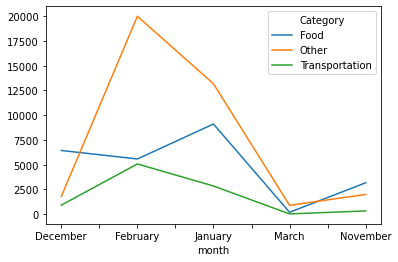

In [93]:
df.pivot_table(index='month',columns='Category', values='INR',aggfunc='sum',fill_value='0').plot()